# Simple Double Pendulum Using Lagrange's Equation

Defines a LagrangianPendulum class that is used to generate double pendulum plots from solving Lagrange's equations.


## Euler-Lagrange equation

For a double pendulum, the Lagrangian with generalized coordinates $\phi_1$ and $\phi_2$ is

$\begin{align}
  \mathcal{L} = \frac12 (m_1+m_2) L_1^2 \dot\phi_1^2 + \frac12 m_2 L_2^2 \dot\phi_2^2 +  m_2L_1L_2\dot\phi_1\dot\phi_2\cos(\phi_1-\phi_2) + (m_1 + m_2)gL_1\cos\phi_1 + m_2gL_2\cos\phi_2
\end{align}$

The Euler-Lagrange equations are

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_1} = \frac{\partial\mathcal L}{\partial\phi_1}
 \quad\Longrightarrow\quad
 \ddot\phi_1 = \frac{m_2g\sin\phi_2\cos(\phi_1-\phi_2) - m_2\sin(\phi_1 - \phi_2)(L_1\dot\phi_1^2\cos(\phi_1 - \phi_2) + L_2\dot\phi_2^2) - (m_1 + m_2)g\sin\phi_1}{L_1(m_1 + m_2\sin^2(\phi_1 - \phi_2)} \\
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_2} = \frac{\partial\mathcal L}{\partial\phi_2}
 \quad\Longrightarrow\quad
 \ddot\phi_2 = \frac{(m_1 + m_2)(L_1\dot\phi_1^2\sin(\phi_1-\phi_2) - g\sin\phi_2 + g\sin\phi_1\cos(\phi_1 - \phi_2)) + m_2L_2\dot\phi_2^2\sin(\phi_1 - \phi_2)\cos(\phi_1 - \phi_2)}{L_2(m_1 + m_2\sin^2(\phi_1 - \phi_2))}
\end{align}$


In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [3]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions
The following class defines 5 parameters used to solve the Lagrangian equations of motion for the simple double pendulum. They are initiated in the __init__ function, then the functions dy_dt and solve_ode solve the differential equations to get the angles, velocities, and accelerations of the pendulum. 

In [4]:
class LagrangianPendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple double pendulum (no driving or damping).
     
    Parameters
    ----------
    L1 : float
        length of the first pendulum
    L2 : float
        length of the second pendulum
    g : float
        gravitational acceleration at the earth's surface
    m1 : float
        mass of pendulum bob 1
    m2 : float
        mass of pendulum bob 2

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2=1., mass1=1., mass2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.mass1 = mass1
        self.mass2 = mass2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with 
            y[0] = phi1 and y[1] = phi1_dot
            y[2] = phi2 and y[3] = phi2_dot
            
        Returns
        -------
        
        """
        phi1, z1, phi2, z2 = y
        
        c, s = np.cos(phi1 - phi2), np.sin(phi1 - phi2)
        denom = (self.mass1 + self.mass2 * s**2)
        
        phi1_dot = z1
        z1_dot = (self.mass2 * self.g * np.sin(phi2) * c \
                    - self.mass2 * s * (self.L1 * z1**2 * c + self.L2 * z2**2) \
                    - (self.mass1 + self.mass2) * self.g * np.sin(phi1)) \
                    / self.L1 / denom
                  
        phi2_dot = z2
        z2_dot = ((self.mass1 + self.mass2) * (self.L1 * z1**2 * s \
                    - self.g * np.sin(phi2) + self.g * np.sin(phi1) * c)
                    + self.mass2 * self.L2 * z2**2 * s * c) \
                    / self.L2 / denom
        
        return phi1_dot, z1_dot, phi2_dot, z2_dot
    
    def solve_ode(self, t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0,
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi1, phi1_dot, phi2, phi2_dot = solution.y

        return phi1, phi1_dot, phi2, phi2_dot
    
    def calc_E(y):
        """Total energy of the system"""
            
        th1, th1d, th2, th2d = y.T
        V = -(m1+m2)*L1*g*np.cos(th1) - m2*L2*g*np.cos(th2)
        T = 0.5*m1*(L1*th1d)**2 + 0.5*m2*((L1*th1d)**2 + (L2*th2d)**2 + 2*L1*L2*th1d*th2d*np.cos(th1-th2))
        return T + V


In [5]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [6]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make simple double pendulum plots 
The time vector is initiated for plotting with 0.001 increments from 0 to 50. The values of the 5 parameters are initiated and used to instantiate a pendulum, p1. 

In [7]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

# creating time vector
t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
g = 1.
mass1 = 1.
mass2 = 1.

# Instantiate a pendulum 
p1 = LagrangianPendulum(L1=L1, L2=L2, mass1=mass1, mass2=mass2, g=g)

In [8]:
# setting initial conditions for the subsequent plots
phi1_0 = np.pi/2.
phi1_dot_0 = 0.
phi2_0 = np.pi
phi2_dot_0 = 0.

# solving for the two angles and angular velocities with an ode solver

phi1, phi1_dot, phi2, phi2_dot = p1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Simple Double Pendulum From Lagrangian:  ' + \
                rf' $\phi_1(0) = {phi1_0:.2f},$' + \
                rf' $\dot\phi_1(0) = {phi1_dot_0:.2f},$' + \
                rf' $\phi_2(0) = {phi2_0:.2f},$' + \
                rf' $\dot\phi_2(0) = {phi2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi(t)$', 
            ax=ax_a) 
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=None, 
            title=r'$\phi(t)$', 
            ax=ax_a)
                              
# # second plot: phi_dot plot 
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1_dot[start : stop], 
            axis_labels=phi_dot_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\dot\phi(t)$', 
            ax=ax_b)   
plot_y_vs_x(t_pts[start : stop], phi2_dot[start : stop], 
            axis_labels=phi_dot_vs_time_labels, 
            color='red',
            label=None, 
            title=r'$\dot\phi(t)$', 
            ax=ax_b) 

# third plot: state space plot from t=0 to t=50   
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi1[start : stop], phi1_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title='State space', 
            ax=ax_c)   
plot_y_vs_x(phi2[start : stop], phi2_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title='State space', 
            ax=ax_c)

fig.tight_layout()
fig.savefig('simple_double_pendulum_Lagrange.png', bbox_inches='tight')  

## Simple Double Pendulum Plots Analysis
The first plot, \$\phi(t)$ shows the angles the two bobs trace out after 50 time increments. Noticeably, $\phi_2$ continues to rotate backwards for many revolutions from t=~17 to t=~29. That is in stark contrast with $\phi_1$ which continues to bounce back and forth unperiodically around $\phi(t)=0$ for all t.

The second plot shows $\dot\phi(t)$ from 0 to 50. Each pendulum's velocity oscillated back and forth between clockwise and counterclockwise at varying speeds, there is nothing unusually special about this plot. 

The State Space plot shows signs of potential chaos. From t=0 to t=50, neither pendulum comes back to its original state in the state space. For a nonchaotic pendulum, there would be an enclosed loop showing oscillatory behavior. The second pendulum especially does not exhibit this behavior, however, there could be a very long period. 

## Simple Double Pendulum State Space Extended

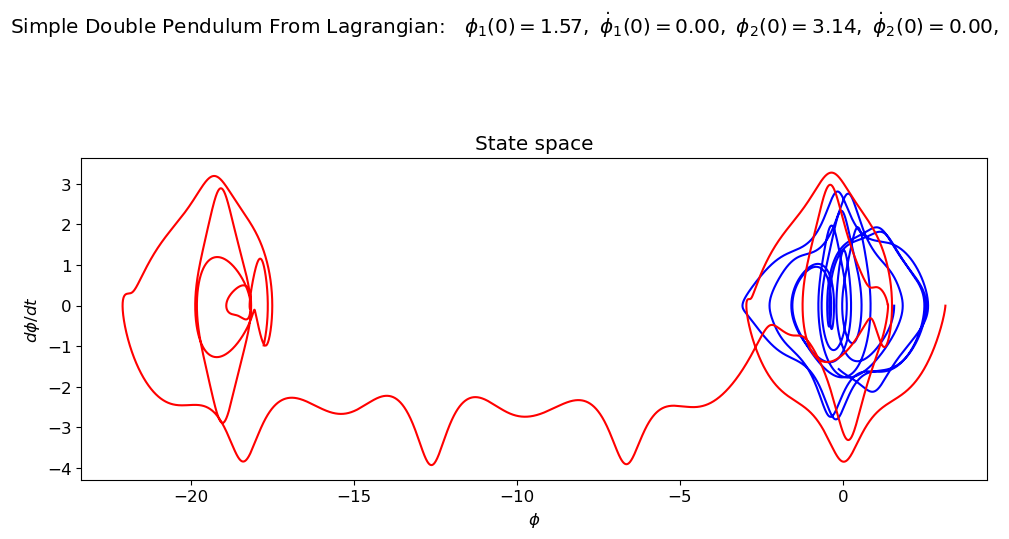

In [9]:
# solving for the two angles and angular velocities with an ode solver

phi1, phi1_dot, phi2, phi2_dot = p1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)

# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Simple Double Pendulum From Lagrangian:  ' + \
                rf' $\phi_1(0) = {phi1_0:.2f},$' + \
                rf' $\dot\phi_1(0) = {phi1_dot_0:.2f},$' + \
                rf' $\phi_2(0) = {phi2_0:.2f},$' + \
                rf' $\dot\phi_2(0) = {phi2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

# third plot: state space plot from t=0 to t=100 
ax_e = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, 2*t_end)    
plot_y_vs_x(phi1[start : stop], phi1_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title='State space', 
            ax=ax_e)   
plot_y_vs_x(phi2[start : stop], phi2_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title='State space', 
            ax=ax_e)

fig.tight_layout()
fig.savefig('Extended_state_space.png', bbox_inches='tight') 

## Simple Double Pendulum State Space Extended Analysis
The State Space plot above was extended to t=100, double the initial observation. Even after this extended time, neither pendulum shows a closed loop. There is a very high probability of chaos with this pendulum. 

## \$\Delta\phi$ Analysis
Further inspection into the possibility of chaos for this pendulum. Testing the sensitivty to initial conditions. 

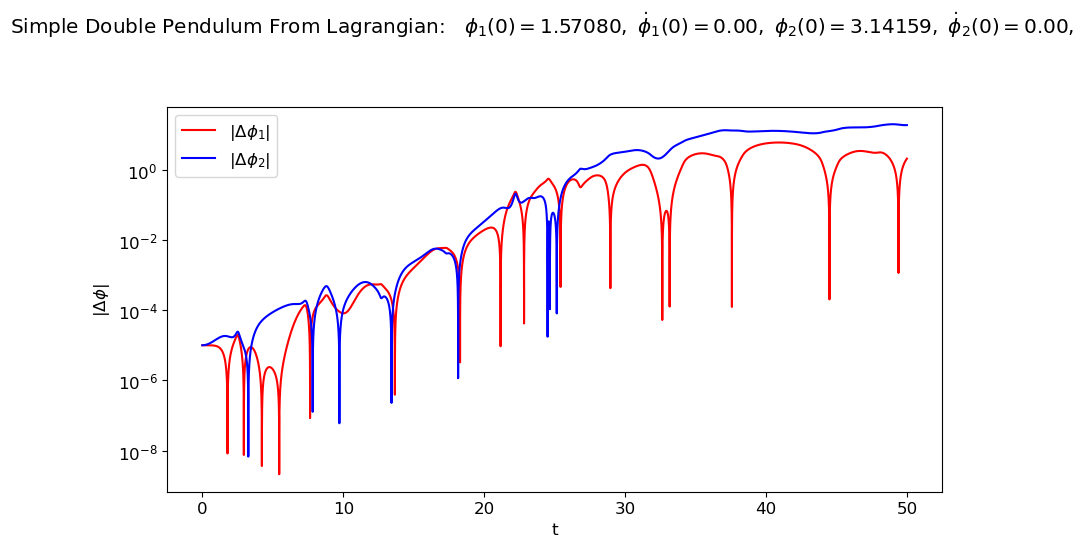

In [10]:
# solving for the two angles and angular velocities with an ode solver
phi1_1, phi1_dot, phi2_1, phi2_dot = p1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)
phi1_2, phi1_dot, phi2_2, phi2_dot = p1.solve_ode(t_pts, phi1_0+0.00001, phi1_dot_0, phi2_0+0.00001, phi2_dot_0)

#subtracting the the phi's and using the difference to plot from t=0 to t=50
Delta_phi1 = np.fabs(phi1_2 - phi1_1)
Delta_phi2 = np.fabs(phi2_2 - phi2_1)

# creating the title for the plot
fig = plt.figure(figsize=(10,5))
overall_title = 'Simple Double Pendulum From Lagrangian:  ' + \
                rf' $\phi_1(0) = {phi1_0:.5f},$' + \
                rf' $\dot\phi_1(0) = {phi1_dot_0:.2f},$' + \
                rf' $\phi_2(0) = {phi2_0:.5f},$' + \
                rf' $\dot\phi_2(0) = {phi2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

#creating the figure named ax_d
ax_d = fig.add_subplot(1,1,1)                  

#semilog plot with t for the x-axis and delta phi as the y axis from 0 to 50. Plotting the difference of phi's for the first pendulum and the second pendulum
start, stop = start_stop_indices(t_pts, t_start, t_end)
ax_d.semilogy(t_pts[start : stop], Delta_phi1[start : stop], 
            color='red', label=None)    
start, stop = start_stop_indices(t_pts, t_start, t_end)
ax_d.semilogy(t_pts[start : stop], Delta_phi2[start : stop], 
            color='blue', label=None)    
ax_d.set_xlabel('t')
ax_d.set_ylabel(r'$|\Delta\phi|$')
ax_d.legend([r'$|\Delta\phi_1|$',r'$|\Delta\phi_2|$'])

fig.savefig('sdp_chaos_proof.png', bbox_inches='tight')  

## \$\Delta\phi$ Analysis

The plot above has a semilogy scale, where the x axis is linear and the y axis is logrythmic. There is a positive linear trend for both \$\phi_1$ and \$\phi_2$. Because of the log scale, this proves with just a small change in initial position, the two pendulums eventually grow apart at an exponential rate. This demonstrates an extreme sensitivity to initial conditions, being the change was +0.00001 radians for each bob. 

## Animating Simple Double Pendulum

In [11]:
from matplotlib import animation, rc
from IPython.display import HTML

In [12]:
def xy_coords(x0, y0, phi, L):
    """convert angle and pendulum length to x,y position
    """
    x = x0 + L * np.sin(phi)
    y = y0 - L * np.cos(phi)
    return x, y

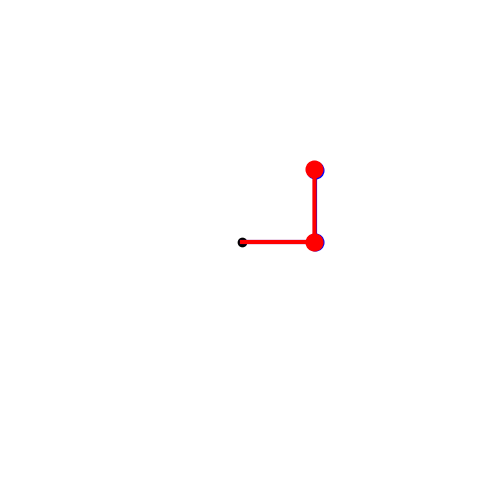

In [13]:
# Animate the double pendulum
# %%capture
x_min = -3.2
x_max = -x_min
y_min = -3.2
y_max = -y_min

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.001

# creating time vector
t_pts = np.arange(t_start, t_end+delta_t, delta_t) 

fig_anim = plt.figure(figsize=(5,5), num='Simple Double Pendulum')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max)
ax_anim.set_ylim(y_min, y_max)

# By assigning the first return from plot to line_anim, we can later change
#  the values in the line.
x0, y0 = 0., 0.
pt0_anim, = ax_anim.plot(x0, y0, 'o', markersize=6, color='black')
x1, y1, = xy_coords(x0, y0, phi1_1[0], p1.L1)
pt1_anim, = ax_anim.plot(x1, y1, 'o', markersize=12, color='blue')
ln1_anim, = ax_anim.plot([x0, x1], [y0, y1], color='blue', lw=3)
x2, y2 = xy_coords(x1, y1, phi2_1[0], p1.L2)
pt2_anim, = ax_anim.plot(x2, y2, 'o', markersize=12, color='blue')
ln2_anim, = ax_anim.plot([x1, x2], [y1, y2], color='blue', lw=3)

x1b, y1b = xy_coords(x0, y0, phi1_2[0], p1.L1)
pt1b_anim, = ax_anim.plot(x1b, y1b, 'o', markersize=12, color='red')
ln1b_anim, = ax_anim.plot([x0, x1b], [y0, y1b], color='red', lw=3)
x2b, y2b = xy_coords(x1b, y1b, phi2_2[0], p1.L2)
pt2b_anim, = ax_anim.plot(x2b, y2b, 'o', markersize=12, color='red')
ln2b_anim, = ax_anim.plot([x1b, x2b], [y1b, y2b], color='red', lw=3)

ax_anim.set_aspect(1)
ax_anim.axis('off')
fig_anim.tight_layout()

In [14]:
def animate_dpendulum(i):
    """This is the function called by FuncAnimation to create each frame,
        numbered by i.  So each i corresponds to a point in the t_pts
        array, with index i.
    """
    i_skip = 50 * i
    
    x0, y0 = 0., 0.
    pt0_anim.set_data(x0, y0)
    
    x1, y1 = xy_coords(x0, y0, phi1_1[i_skip], p1.L1)
    pt1_anim.set_data(x1,y1)
    ln1_anim.set_data([x0, x1], [y0, y1])
    x2, y2 = xy_coords(x1, y1, phi2_1[i_skip], p1.L2)
    pt2_anim.set_data(x2,y2)
    ln2_anim.set_data([x1, x2], [y1, y2])
    
    x1b, y1b = xy_coords(x0, y0, phi1_2[i_skip], p1.L1)
    pt1b_anim.set_data(x1b,y1b)
    ln1b_anim.set_data([x0, x1b], [y0, y1b])
    x2b, y2b = xy_coords(x1b, y1b, phi2_2[i_skip], p1.L2)
    pt2b_anim.set_data(x2b,y2b)
    ln2b_anim.set_data([x1b, x2b], [y1b, y2b])
    
    return (pt0_anim, pt1_anim, ln1_anim, pt2_anim, ln2_anim, pt1b_anim, ln1b_anim, pt2b_anim, ln2b_anim)

In [15]:
frame_interval = 1.  # time between frames
frame_number = 1000    # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animate_dpendulum, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=False)

In [16]:
HTML(anim.to_jshtml())